In [100]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [101]:
from google.colab import files
uploaded  = files.upload() 
df = pd.read_csv("diabetes.csv")

Saving diabetes.csv to diabetes (6).csv


In [102]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = df['Outcome']

X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2)
print(X_train.head())

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
439            6      107             88  ...  36.8                     0.727   31
642            6      147             80  ...  29.5                     0.178   50
281           10      129             76  ...  35.9                     0.280   39
247            0      165             90  ...  52.3                     0.427   23
122            2      107             74  ...  33.6                     0.404   23

[5 rows x 8 columns]


In [103]:
print("Shape of train set",X_train.shape,Y_train.shape)
print("Shape of test set",X_test.shape,Y_test.shape)

Shape of train set (614, 8) (614,)
Shape of test set (154, 8) (154,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff33ef4a780>,
      dtype=object)

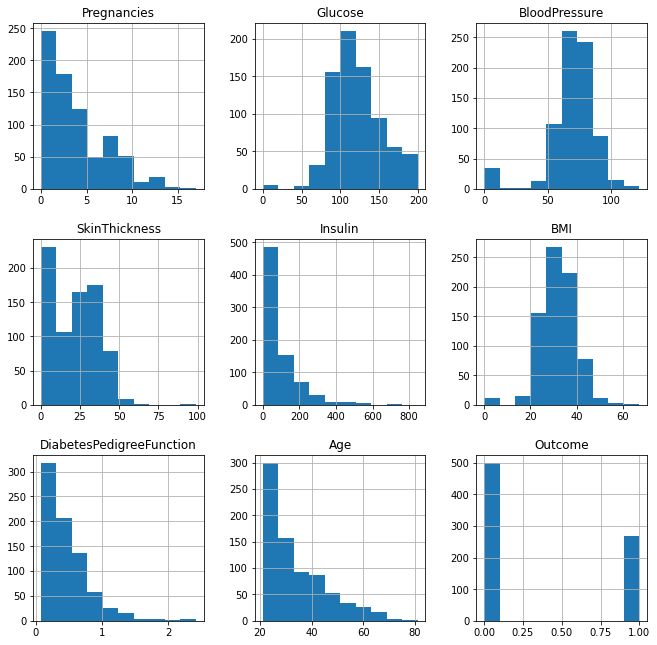

In [104]:
df.hist(figsize=[11,11])

Applying KNN model before preprocessing

In [105]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

0.6818181818181818

Standardization

In [106]:
# Standardizing the train and test data
X_train_scale=scale(X_train[['Pregnancies','Glucose','BloodPressure',
                             'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
X_test_scale=scale(X_test[['Pregnancies','Glucose','BloodPressure',
                           'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
# Fitting k-NN on our scaled data set
knn_after_std=KNeighborsClassifier(n_neighbors=5)
knn_after_std.fit(X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness',
                           'Insulin','BMI','DiabetesPedigreeFunction','Age']],Y_train.values.ravel())
# Checking the performance of our model on the testing data set
print("\nAccuracy score on test set :", accuracy_score(Y_test,knn_after_std.predict(X_test_scale)))


Accuracy score on test set : 0.6233766233766234


Normalization

In [107]:
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                              'Insulin','BMI','DiabetesPedigreeFunction','Age']])
X_test_minmax=min_max.fit_transform(X_test[['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                            'Insulin','BMI','DiabetesPedigreeFunction','Age']])
# Fitting k-NN on our scaled data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.7207792207792207